In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
datasig=pd.read_csv("sig_lep_values.csv")
databkg=pd.read_csv("bkg_lep_values.csv")

In [3]:
datasig.shape

(3742, 41)

In [4]:
databkg.shape

(3759, 41)

In [5]:
datasig["label"]=1
databkg["label"]=0

In [6]:
data2=datasig.append(databkg,ignore_index=True)

In [7]:
data2.shape


(7501, 42)

In [8]:
data2.head()

JetPt1   JetEta1   JetPhi1   JetMass1   JetBTagger1    JetPt2   JetEta2  \
0   88.5684 -0.820965  -1.00479    14.3054      0.045989   37.2247  0.857552   
1  238.2260 -0.075395   2.53772    38.1016      0.830461  135.3070  0.081423   
2   89.6729  0.836642  -2.93151    13.5557      0.812954   79.2935  1.317940   
3  100.6620 -0.702891   2.33921    15.9892      0.995806   31.1602 -1.524550   
4   80.8547  0.065758  -2.70234    14.1674      0.023284   51.9911  1.375690   

    JetPhi2   JetMass2   JetBTagger2  ...   ExtraLepEta1   ExtraLepPt2  \
0 -1.815580    8.03742      0.995505  ...       1.064810      -999.000   
1 -0.813308   12.06290      0.196997  ...      -0.606160      -999.000   
2 -0.694853   12.43400      0.982839  ...       0.781414      -999.000   
3  0.905344    5.05075      0.143518  ...      -0.160192        73.835   
4  2.097400    6.13648      0.622497  ...       1.516900      -999.000   

    ExtraLepPhi2   ExtraLepEta2       ZZPt     ZZPhi     ZZEta   ZZMass  \
0     -999.00000     -999.00000   27.91030 -0.118611 -0.603835  123.722   
1     -999.00000     -999.00000   25.38400  0.029179  2.080710  124.753   
2     -999.00000     -999.00000    8.27421  3.054510  3.906910  123.684   
3       -2.86454       -1.09274   51.60050  1.219790 -1.733600  124.205   
4     -999.00000     -999.00000  165.91500  0.738980  0.759890  123.543   

     weight  label  
0  0.000048      1  
1  0.000076      1  
2  0.000038      1  
3  0.000051      1  
4  0.000053      1  

[5 rows x 42 columns]

In [9]:
X=data2.iloc[:,:-2]
Y=data2.iloc[:,-1]
weights=data2.iloc[:,-2]

In [10]:
X_train, X_test, y_train, y_test,weight_train,weight_test = train_test_split(X, Y,weights, test_size=0.3, random_state=7)

In [11]:
X_train=np.asarray(X_train).astype('float32')
X_test=np.asarray(X_test).astype('float32')
y_train=np.asarray(y_train).astype('float32')
y_test=np.asarray(y_test).astype('float32')
weight_train=weight_train
weight_test=weight_test
weight_test=np.asarray(weight_test).astype("float32")
weight_train=np.asarray(weight_train).astype("float32")


In [12]:
weight_train

array([5.29900e-05, 5.34537e-05, 8.25816e-05, ..., 4.06706e-05,
       4.39500e-05, 5.91009e-05], dtype=float32)

In [13]:
ndim=X.shape[1]

In [14]:
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(ndim,)))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, epochs=40,batch_size=512,validation_data=(X_test, y_test,weight_test),sample_weight=weight_train)

Instructions for updating:
Use tf.cast instead.
Train on 5250 samples, validate on 2251 samples
Epoch 1/40
5250/5250 [==============================] - 0s 31us/step - loss: 4.5081e-04 - acc: 0.5036 - val_loss: 4.3857e-04 - val_acc: 0.4984
Epoch 2/40
5250/5250 [==============================] - 0s 3us/step - loss: 4.4449e-04 - acc: 0.5046 - val_loss: 4.3743e-04 - val_acc: 0.5153
Epoch 3/40
5250/5250 [==============================] - 0s 3us/step - loss: 4.4442e-04 - acc: 0.5059 - val_loss: 4.3471e-04 - val_acc: 0.4993
Epoch 4/40
5250/5250 [==============================] - 0s 3us/step - loss: 4.4540e-04 - acc: 0.5046 - val_loss: 4.3266e-04 - val_acc: 0.5024
Epoch 5/40
5250/5250 [==============================] - 0s 3us/step - loss: 4.4330e-04 - acc: 0.5074 - val_loss: 4.3213e-04 - val_acc: 0.5167
Epoch 6/40
5250/5250 [==============================] - 0s 3us/step - loss: 4.4478e-04 - acc: 0.5042 - val_loss: 4.3818e-04 - val_acc: 0.4993
Epoch 7/40
5250/5250 [=============================

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

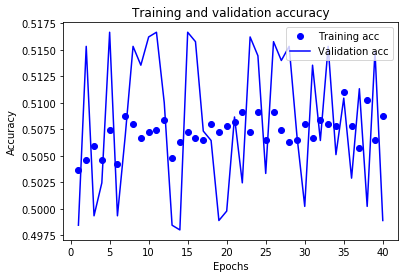

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(X_test, y_test,sample_weight=weight_test)
results

2251/2251 [==============================] - 0s 8us/step


[0.0004301971223312693, 0.49888938256286613]

In [22]:
probs=model.predict(X_test)

In [23]:
from sklearn.metrics import roc_curve
y_pred_keras= model.predict_proba(X_test)
# keep probabilities for the positive outcome only
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,sample_weight=weight_test)

In [24]:
y_pred_keras[10:30]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

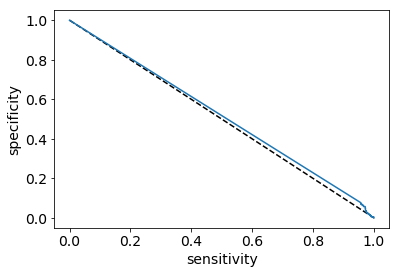

In [25]:
plt.figure(2)
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(tpr_keras, 1-fpr_keras, label='Keras:DNN')
plt.xlabel("sensitivity",fontsize=14)
plt.ylabel("specificity",fontsize=14)
plt.tick_params(axis="both",labelsize=14)
plt.show()

In [26]:
for kk in range(tpr_keras.size):
    if(round(tpr_keras[kk],4)==0.4000):
        spe=1-fpr_keras[kk]
        print(spe)

In [27]:
filename="DNN_had.CSV"
with open(filename,"w") as file:
    for kk in range(tpr_keras.size):
        file.write(str(fpr_keras[kk]))
        file.write(" ")
        file.write(str(tpr_keras[kk]))
        file.write("\n")

In [28]:
sig_probs=[]
bkg_probs=[]
sig_weight=[]
bkg_weight=[]
for index in range(y_test.shape[0]):
    if(y_test[index]==1.0):
        sig_probs.append(probs[index][0])
        sig_weight.append(weight_test[index])
    else:
        bkg_probs.append(probs[index][0])
        bkg_weight.append(weight_test[index])
    

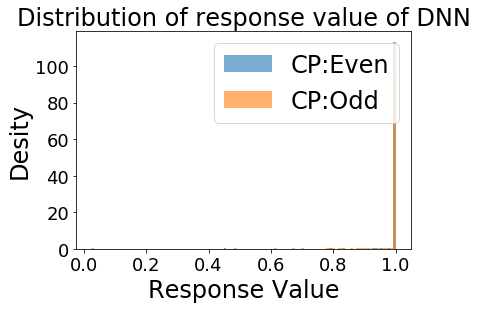

In [29]:
plt.figure(3)
plt.rcParams['figure.figsize'] = [12, 12]

plt.hist(sig_probs,bins=100,density=True,alpha=0.6,label="CP:Even");
plt.hist(bkg_probs,bins=100,density=True,alpha=0.6,label="CP:Odd");
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Response Value",fontsize=24)
plt.title("Distribution of response value of DNN",fontsize=24)
plt.ylabel("Desity",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('DNN_had_output.png')
plt.show()

In [30]:
sig_probs

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.60991335,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.89622396,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7555305,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.23304349,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.79374415,
 1.0,
 1.0,
 1.0,
 0.7667229,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.34699127,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,

In [31]:
len(sig_probs)

1123

In [32]:
#write the response value as histogram into root file
from ROOT import TFile, TH1F
file=TFile("DNN_had_hist.root","RECREATE")
h1=TH1F("sig","histo of signal",100,0,1)
h2=TH1F("bkg","histo of background",100,0,1)
for kk in range(len(sig_probs)):
    h1.Fill(sig_probs[kk],sig_weight[kk])
for kk in range(len(bkg_probs)):
    h2.Fill(bkg_probs[kk],bkg_weight[kk])
inte1=h2.Integral("width")
scale1=1/h1.Integral("width")
scale2=1/h2.Integral("width")
h1.Scale(scale1)
h2.Scale(scale2)
file.Write();
#By default the integral is computed as the sum of bin contents in the range. 
#if option "width" is specified, the integral is the sum of the bin contents multiplied by the bin width in x.



ModuleNotFoundError: No module named 'ROOT'